# Vaccine Hesitancy

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## **Data source 1** - CDC Esitmated County Hesitancy

- Collection period March 3, 2021 – March 15, 2021

In [2]:
CDC_df = pd.read_csv('Data/Vaccine_Hesitancy_for_COVID-19__County_and_local_estimates.csv', engine='python')
CDC_df.head()

,FIPS Code,County Name,State,Estimated hesitant,Estimated hesitant or unsure,Estimated strongly hesitant,Social Vulnerability Index (SVI),SVI Category,CVAC level of concern for vaccination rollout,CVAC Level Of Concern,...,Percent Hispanic,Percent non-Hispanic American Indian/Alaska Native,Percent non-Hispanic Asian,Percent non-Hispanic Black,Percent non-Hispanic Native Hawaiian/Pacific Islander,Percent non-Hispanic White,Geographical Point,State Code,County Boundary,State Boundary
0,1079,"Lawrence County, Alabama",ALABAMA,0.1913,0.2762,0.0999,0.50,Moderate Vulnerability,0.80,High Concern,...,0.0219,0.0560,0.0020,0.1058,0.0008,0.7649,POINT (-86.844516 32.756889),AL,"MULTIPOLYGON (((-87.529795 34.518525, -87.5297...","MULTIPOLYGON (((-88.139988 34.581703, -88.1352..."
1,1107,"Pickens County, Alabama",ALABAMA,0.1825,0.2688,0.0917,0.92,Very High Vulnerability,0.78,High Concern,...,0.0487,0.0014,0.0006,0.3984,0.0006,0.5365,POINT (-86.844516 32.756889),AL,"MULTIPOLYGON (((-88.29705899999999 33.349083, ...","MULTIPOLYGON (((-88.139988 34.581703, -88.1352..."
2,1035,"Conecuh County, Alabama",ALABAMA,0.1915,0.2943,0.0963,0.81,Very High Vulnerability,0.89,Very High Concern,...,0.0068,0.0020,0.0045,0.4776,0.0000,0.5005,POINT (-86.844516 32.756889),AL,"MULTIPOLYGON (((-87.165662 31.542897, -87.1653...","MULTIPOLYGON (((-88.139988 34.581703, -88.1352..."
3,4021,"Pinal County, Arizona",ARIZONA,0.1422,0.2077,0.0877,0.86,Very High Vulnerability,0.87,Very High Concern,...,0.3016,0.0430,0.0158,0.0408,0.0029,0.5679,POINT (-111.664616 34.293239),AZ,"MULTIPOLYGON (((-111.685911 33.204637, -111.61...",MULTIPOLYGON (((-114.516842 33.027885999999995...
4,1067,"Henry County, Alabama",ALABAMA,0.1929,0.2871,0.0996,0.55,Moderate Vulnerability,0.65,High Concern,...,0.0262,0.0018,0.0040,0.2655,0.0010,0.6917,POINT (-86.844516 32.756889),AL,"MULTIPOLYGON (((-85.415774 31.490413, -85.4153...","MULTIPOLYGON (((-88.139988 34.581703, -88.1352..."


### Ensuring we have a consistent county naming scheme

In [3]:
test = "Lawrence County, Alabama"

def clean_county_name(row):
    x = row.split(',')[0].split(' ')[0]
    return x
    
CDC_df['county'] = CDC_df['County Name'].map(clean_county_name)

## **Data source 2** - US County Covid Data (Kaggle)

Here we want to discard all the data after the survey collection date mentioned above (15-03-2021).

In [4]:
County_df = pd.read_csv('Data/covid_us_county.csv',parse_dates=['date'])
County_df.head()

,fips,county,state,lat,long,date,cases,state_code,deaths
0,1001.0,Autauga,Alabama,32.539527,-86.644082,2020-01-22,0,AL,0
1,1001.0,Autauga,Alabama,32.539527,-86.644082,2020-01-23,0,AL,0
2,1001.0,Autauga,Alabama,32.539527,-86.644082,2020-01-24,0,AL,0
3,1001.0,Autauga,Alabama,32.539527,-86.644082,2020-01-25,0,AL,0
4,1001.0,Autauga,Alabama,32.539527,-86.644082,2020-01-26,0,AL,0


In [5]:
County_df.dtypes

fips                 float64
county                object
state                 object
lat                  float64
long                 float64
date          datetime64[ns]
cases                  int64
state_code            object
deaths                 int64
dtype: object

In [6]:
end_date = '15-03-2021'
County_df = County_df[(County_df['date'] <= end_date)]

### Aggregating the Data

In [7]:
County_df = County_df.groupby('county', as_index = False).sum()
County_df.head()

,county,fips,lat,long,cases,deaths
0,Abbeville,18855419.0,14339.576854,-34551.455057,258629,4735
1,Acadia,9218419.0,12693.632193,-38721.548535,1021332,32127
2,Accomack,21369419.0,15824.403005,-31689.953037,449672,6562
3,Ada,6704419.0,18206.663493,-48705.210120,6306697,60639
4,Adair,45672676.0,64740.059261,-153777.914769,884957,15534


## Joining the two data sets

In [8]:
Final_df = CDC_df.copy()
Final_df.join(County_df.set_index('county'), on='county')

,FIPS Code,County Name,State,Estimated hesitant,Estimated hesitant or unsure,Estimated strongly hesitant,Social Vulnerability Index (SVI),SVI Category,CVAC level of concern for vaccination rollout,CVAC Level Of Concern,...,Geographical Point,State Code,County Boundary,State Boundary,county,fips,lat,long,cases,deaths
0,1079,"Lawrence County, Alabama",ALABAMA,0.1913,0.2762,0.0999,0.50,Moderate Vulnerability,0.80,High Concern,...,POINT (-86.844516 32.756889),AL,"MULTIPOLYGON (((-87.529795 34.518525, -87.5297...","MULTIPOLYGON (((-88.139988 34.581703, -88.1352...",Lawrence,123186419.0,173473.477026,-407838.430769,4215444.0,90492.0
1,1107,"Pickens County, Alabama",ALABAMA,0.1825,0.2688,0.0917,0.92,Very High Vulnerability,0.78,High Concern,...,POINT (-86.844516 32.756889),AL,"MULTIPOLYGON (((-88.29705899999999 33.349083, ...","MULTIPOLYGON (((-88.139988 34.581703, -88.1352...",Pickens,24893209.0,43004.030307,-106962.388150,2471828.0,38757.0
2,1035,"Conecuh County, Alabama",ALABAMA,0.1915,0.2943,0.0963,0.81,Very High Vulnerability,0.89,Very High Concern,...,POINT (-86.844516 32.756889),AL,"MULTIPOLYGON (((-87.165662 31.542897, -87.1653...","MULTIPOLYGON (((-88.139988 34.581703, -88.1352...",Conecuh,433665.0,13170.853136,-36450.150984,176681.0,3865.0
3,4021,"Pinal County, Arizona",ARIZONA,0.1422,0.2077,0.0877,0.86,Very High Vulnerability,0.87,Very High Concern,...,POINT (-111.664616 34.293239),AZ,"MULTIPOLYGON (((-111.685911 33.204637, -111.61...",MULTIPOLYGON (((-114.516842 33.027885999999995...,Pinal,1684799.0,13787.302377,-46653.533338,5386549.0,86663.0
4,1067,"Henry County, Alabama",ALABAMA,0.1929,0.2871,0.0996,0.55,Moderate Vulnerability,0.65,High Concern,...,POINT (-86.844516 32.756889),AL,"MULTIPOLYGON (((-85.415774 31.490413, -85.4153...","MULTIPOLYGON (((-88.139988 34.581703, -88.1352...",Henry,107207854.0,158558.585245,-363532.396778,5799656.0,90336.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1542,27113,"Pennington County, Minnesota",MINNESOTA,0.0961,0.1327,0.0603,0.30,Low Vulnerability,0.27,Low Concern,...,POINT (-94.198308 46.349153),MN,MULTIPOLYGON (((-96.50102799999999 48.10869299...,"MULTIPOLYGON (((-96.784381 46.630503999999995,...",Pennington,30677504.0,38576.914884,-83322.825663,1804451.0,24027.0
1543,39165,"Warren County, Ohio",OHIO,0.1639,0.2199,0.1007,0.05,Very Low Vulnerability,0.01,Very Low Concern,...,POINT (-82.70936 40.415534),OH,"MULTIPOLYGON (((-84.337159 39.488659, -84.3371...","MULTIPOLYGON (((-84.803251 40.989394, -84.8038...",Warren,181605494.0,226555.280546,-493160.288354,8632663.0,170085.0
1544,28055,"Issaquena County, Mississippi",MISSISSIPPI,0.1546,0.2738,0.0840,0.95,Very High Vulnerability,0.99,Very High Concern,...,POINT (-89.65344 32.713378),MS,"MULTIPOLYGON (((-91.052566 33.010315999999996,...","MULTIPOLYGON (((-90.955974 34.120125, -90.9593...",Issaquena,11755045.0,13711.906394,-38118.075949,27859.0,964.0
1545,28031,"Covington County, Mississippi",MISSISSIPPI,0.1544,0.2516,0.0885,0.79,High Vulnerability,0.81,Very High Concern,...,POINT (-89.65344 32.713378),MS,"MULTIPOLYGON (((-89.586517 31.784975, -89.5841...","MULTIPOLYGON (((-90.955974 34.120125, -90.9593...",Covington,33792350.0,42177.589649,-107260.112845,956157.0,22284.0


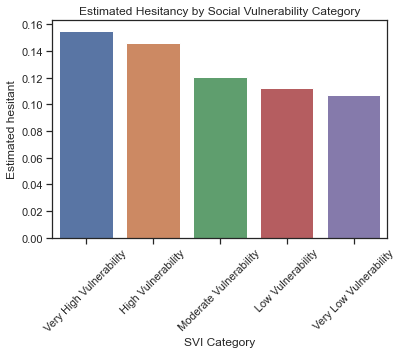

In [9]:
sns.set_theme(style="ticks")
stats_df = Final_df.groupby('SVI Category', as_index = False).median()

vulnerability_dict = {
    1: "Very High Vulnerability",
    2: "High Vulnerability",
    3: "Moderate Vulnerability",
    4: "Low Vulnerability",
    5: "Very Low Vulnerability",
}
vulnerability_order = ["Very High Vulnerability","High Vulnerability", "Moderate Vulnerability", "Low Vulnerability","Very Low Vulnerability"]

sns.barplot(x="SVI Category", y="Estimated hesitant", data=stats_df, order = vulnerability_order)

plt.title("Estimated Hesitancy by Social Vulnerability Category")
plt.xticks(rotation = 45)
plt.show()

### Master file

In [10]:
Final_df.to_csv('Data/master.csv')